In [39]:
# %matplotlib notebook
%matplotlib inline
from ipynb_setup import *
import sys
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd

import os
import re

In [40]:
from utils.file_utils import get_experiment_df, get_experiment_configs_df
from utils.path_utils import visuals_folder
from plotlib.performance_plots import plot_standard_dev

In [41]:
sns.set_style("whitegrid")

In [3]:
# base_path = Path("/home/c817h/Documents/logs_cluster/activelearning/fashion_mnist")
# base_path = Path("/home/c817h/Documents/logs_cluster/activelearning/mnist")
# base_path = Path("/home/c817h/Documents/logs/activelearning/toy_moons_sweeps")
# base_path = Path("/home/c817h/Documents/logs/activelearning/toy_moons")
base_path = Path("/home/c817h/Documents/logs/activelearning/toy_circles")
paths = [path for path in base_path.iterdir() if path.is_dir()]
paths.sort()
print("Folders in Path: \n {}\n".format(base_path))

for path in paths:
    print(path.name)

Folders in Path: 
 /home/c817h/Documents/logs/activelearning/toy_circles

active_basic_set-toy_two_moons_bayesian_mlp_deep_dop-0.25_acq-bald_ep-40
active_basic_set-toy_two_moons_bayesian_mlp_deep_dop-0.25_acq-batchbald_ep-40
active_basic_set-toy_two_moons_bayesian_mlp_deep_dop-0.25_acq-entropy_ep-40
active_basic_set-toy_two_moons_bayesian_mlp_deep_dop-0.25_acq-random_ep-40
active_basic_set-toy_two_moons_bayesian_mlp_deep_dop-0_acq-entropy_ep-40
active_basic_set-toy_two_moons_bayesian_mlp_deep_dop-0_acq-random_ep-40
active_fixmatch_set-toy_two_moons_bayesian_mlp_deep_dop-0.25_acq-bald_ep-40
active_fixmatch_set-toy_two_moons_bayesian_mlp_deep_dop-0.25_acq-batchbald_ep-40
active_fixmatch_set-toy_two_moons_bayesian_mlp_deep_dop-0.25_acq-entropy_ep-40
active_fixmatch_set-toy_two_moons_bayesian_mlp_deep_dop-0.25_acq-random_ep-40
active_fixmatch_set-toy_two_moons_bayesian_mlp_deep_dop-0_acq-entropy_ep-40
active_fixmatch_set-toy_two_moons_bayesian_mlp_deep_dop-0_acq-random_ep-40


In [4]:
# mnist patterns
# match_patterns = [
#     r".*mnist_batchbald_query.*",
#     r".*batchbald_double_query.*",
# ]
filter_patterns = [
]

# fixmatch patterns
match_patterns = [
#     r".*",
    r".*active_basic_set.*",
#         r".*active_fixmatch_set.*",
#     r".*fixmatch.*ema-False",
#     r".*fixmatch_bayesian_mlp_deep_drop-0_wd.*",
#     r".*basic_.*",
#     r".*basic_bayesian_mlp_deep_.*",
]

filter_patterns = [
#     ".*wd-0.01_.*",
#     ".*deep.*"
#     r".*dop-0.25.*",
#         r".*dop-0_.*",
]

experiment_paths = []
for path in paths:
    for pattern in match_patterns:
        out = re.match(pattern, str(path))
        if out is not None:
            skip = False
            for filter_pattern in filter_patterns:
                if re.match(filter_pattern, str(path)) is not None:
                    skip=True
            if skip:
                continue
                    
            print(path.name)
            experiment_paths.append(path)
            continue
        

active_basic_set-toy_two_moons_bayesian_mlp_deep_dop-0.25_acq-bald_ep-40
active_basic_set-toy_two_moons_bayesian_mlp_deep_dop-0.25_acq-batchbald_ep-40
active_basic_set-toy_two_moons_bayesian_mlp_deep_dop-0.25_acq-entropy_ep-40
active_basic_set-toy_two_moons_bayesian_mlp_deep_dop-0.25_acq-random_ep-40
active_basic_set-toy_two_moons_bayesian_mlp_deep_dop-0_acq-entropy_ep-40
active_basic_set-toy_two_moons_bayesian_mlp_deep_dop-0_acq-random_ep-40


In [5]:
# # mnist patterns
hue_name = "Acquisition"
hue_split = "acq-"
# hue_split = "query-"
# style_name = "Acquisition Size"
# style_fct = lambda x : 20 if x.__str__().find(style_split)!=-1 else 10
style_name = None
style_vals = None

# fixmatch toy patterns
# hue_name = "lambda"
# hue_split = "lambda-"
# style_name = "WD - Drop"
# style_fct = lambda x: "WD="+x.name.split('wd-')[1].split('_')[0]+ " Drop="+ x.name.split('drop-')[1].split('_')[0]

# Basic toy patterns
# hue_name = "Dropout_p"
# hue_split = "drop-"
# style_name = "wd"
# style_fct = lambda x: x.name.split('wd-')[1].split('_')[0]

# style_name = "Training"
# style_fct = lambda x : x.name.split("active_")[1].split("_")[0]

style_name = "Dropout"
style_fct = lambda x : x.name.split("dop-")[1].split("_")[0]



hue_names = [path.name.split(hue_split)[1].split('_')[0] for path in experiment_paths]#.split('_')[0] for path in paths]

style_vals = [style_fct(path) for path in experiment_paths]

unit_vals = None
unit_name = "Unit"


In [6]:
df = []
for i, (base_dir) in enumerate(experiment_paths):
    base_dir = Path(base_dir)
    if hue_names is not None:
        hue_val = hue_names[i]
    else:
        hue_val = None
    if style_vals is not None:
        style_val = style_vals[i]
    else:
        style_val = None
    if unit_vals is not None:
        unit_val = unit_vals[i]
    else:
        unit_val = None

    experiment_frame = get_experiment_df(base_dir, None)
    # experiment_frame[hue_name] = hue_val
    if experiment_frame is None:
        continue
    experiment_frame[hue_name] = hue_val
    experiment_frame[style_name] = style_val
    experiment_frame[unit_name] = unit_val
    df.append(experiment_frame)
df = pd.concat(df)
df.reset_index(inplace=True)

Loading Experiment: /home/c817h/Documents/logs/activelearning/toy_circles/active_basic_set-toy_two_moons_bayesian_mlp_deep_dop-0.25_acq-bald_ep-40
Found num files: 10
Loading Experiment: /home/c817h/Documents/logs/activelearning/toy_circles/active_basic_set-toy_two_moons_bayesian_mlp_deep_dop-0.25_acq-batchbald_ep-40
Found num files: 10
Loading Experiment: /home/c817h/Documents/logs/activelearning/toy_circles/active_basic_set-toy_two_moons_bayesian_mlp_deep_dop-0.25_acq-entropy_ep-40
Found num files: 10
Loading Experiment: /home/c817h/Documents/logs/activelearning/toy_circles/active_basic_set-toy_two_moons_bayesian_mlp_deep_dop-0.25_acq-random_ep-40
Found num files: 10
Loading Experiment: /home/c817h/Documents/logs/activelearning/toy_circles/active_basic_set-toy_two_moons_bayesian_mlp_deep_dop-0_acq-entropy_ep-40
Found num files: 10
Loading Experiment: /home/c817h/Documents/logs/activelearning/toy_circles/active_basic_set-toy_two_moons_bayesian_mlp_deep_dop-0_acq-random_ep-40
Found num

In [100]:
df = df[df.Name !=  "basic_bayesian_mlp_deep_drop-0.25_wd-0"]
df

,index,val_acc,test_acc,num_samples,version,Name,Acquisition,Dropout,Unit
0,0,0.5100,0.5194,6,0,active_basic_set-toy_two_moons_bayesian_mlp_de...,bald,0.25,None
1,1,0.6025,0.6194,12,0,active_basic_set-toy_two_moons_bayesian_mlp_de...,bald,0.25,None
2,2,0.9000,0.8612,18,0,active_basic_set-toy_two_moons_bayesian_mlp_de...,bald,0.25,None
3,3,0.8600,0.8416,24,0,active_basic_set-toy_two_moons_bayesian_mlp_de...,bald,0.25,None
4,4,0.9300,0.9182,30,0,active_basic_set-toy_two_moons_bayesian_mlp_de...,bald,0.25,None
...,...,...,...,...,...,...,...,...,...
595,5,0.8850,0.8774,36,9,active_basic_set-toy_two_moons_bayesian_mlp_de...,random,0,None
596,6,0.9125,0.8930,42,9,active_basic_set-toy_two_moons_bayesian_mlp_de...,random,0,None
597,7,0.9400,0.9270,48,9,active_basic_set-toy_two_moons_bayesian_mlp_de...,random,0,None
598,8,0.9150,0.9050,54,9,active_basic_set-toy_two_moons_bayesian_mlp_de...,random,0,None


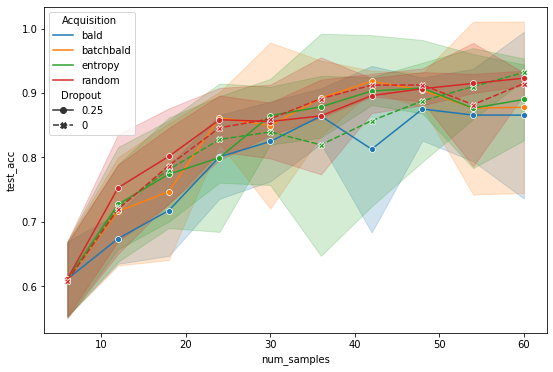

In [101]:
if style_vals is None:
    style_name = None
if unit_vals is None:
    unit_name = None

fig, ax = plt.subplots()
ax = plot_standard_dev(
    ax, df, hue=hue_name, style=style_name, units=unit_name
)  # , units=unit_name)
fig.set_size_inches(9, 6)
plt.show()

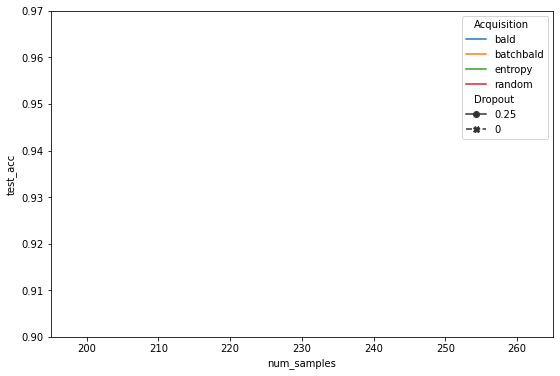

In [102]:
fig, ax = plt.subplots()
ax = plot_standard_dev(
    ax, df, hue=hue_name, style=style_name, units=unit_name
)  # , units=unit_name)
ax.set_xlim(195, 265)
ax.set_ylim(0.90, 0.97)
fig.set_size_inches(9, 6)
plt.show()

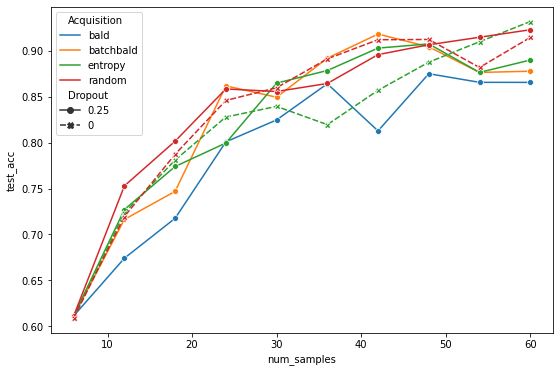

In [103]:
fig, ax = plt.subplots()
ax = plot_standard_dev(
    ax, df, hue=hue_name, style=style_name, units=unit_name, ci=None
)  # , units=unit_name)
fig.set_size_inches(9, 6)
plt.show()

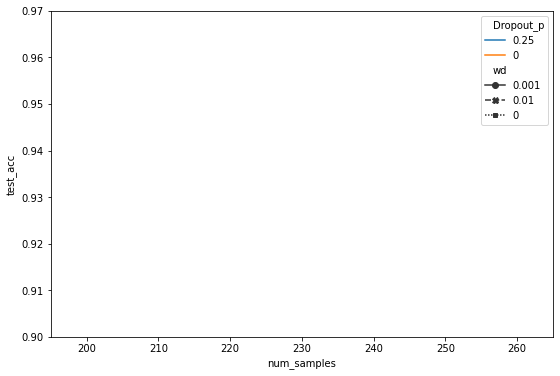

In [197]:
fig, ax = plt.subplots()
ax = plot_standard_dev(
    ax, df, hue=hue_name, style=style_name, units=unit_name, ci=None
)  # , units=unit_name)
ax.set_xlim(195, 265)
ax.set_ylim(0.90, 0.97)
fig.set_size_inches(9, 6)
plt.show()

In [ ]:
from copy import deepcopy


In [205]:
base_path = Path("/home/c817h/Documents/logs/activelearning/toy_moons_sweeps")
experiment_paths = [
    "fixmatch_bayesian_mlp_deep_drop-0_wd-0_lambda-3_ema-False",
    "basic_bayesian_mlp_deep_drop-0_wd-0.001"
    
    
]

experiment_paths = [base_path/ex_path for ex_path in experiment_paths]

In [210]:
hue_name = "Training"
hue_names = [path.name.split('_')[0] for path in experiment_paths]
style_vals = None

In [211]:
df = []
for i, (base_dir) in enumerate(experiment_paths):
    base_dir = Path(base_dir)
    if hue_names is not None:
        hue_val = hue_names[i]
    else:
        hue_val = None
    if style_vals is not None:
        style_val = style_vals[i]
    else:
        style_val = None
    if unit_vals is not None:
        unit_val = unit_vals[i]
    else:
        unit_val = None

    experiment_frame = get_experiment_df(base_dir, hue_val)
    # experiment_frame[hue_name] = hue_val
    if experiment_frame is None:
        continue
    experiment_frame[hue_name] = hue_val
    experiment_frame[style_name] = style_val
    experiment_frame[unit_name] = unit_val
    df.append(experiment_frame)
df = pd.concat(df)
df.reset_index(inplace=True)

Loading Experiment: /home/c817h/Documents/logs/activelearning/toy_moons_sweeps/fixmatch_bayesian_mlp_deep_drop-0_wd-0_lambda-3_ema-False
Found num files: 10
Loading Experiment: /home/c817h/Documents/logs/activelearning/toy_moons_sweeps/basic_bayesian_mlp_deep_drop-0_wd-0.001
Found num files: 10


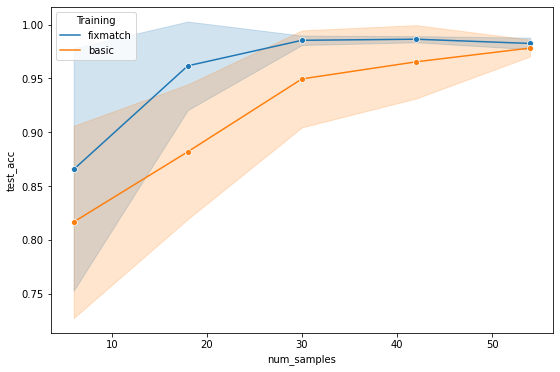

In [212]:
if style_vals is None:
    style_name = None
if unit_vals is None:
    unit_name = None

fig, ax = plt.subplots()
ax = plot_standard_dev(
    ax, df, hue=hue_name, style=style_name, units=unit_name
)  # , units=unit_name)
fig.set_size_inches(9, 6)
plt.show()

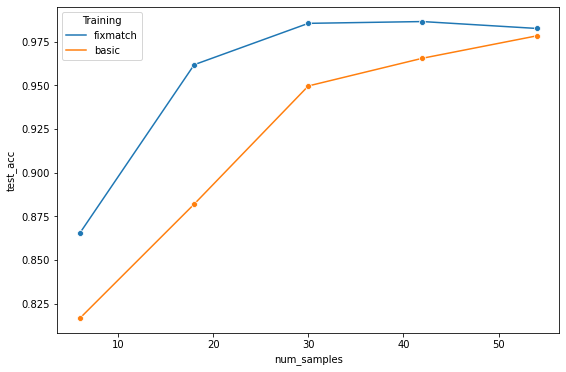

In [215]:
fig, ax = plt.subplots()
ax = plot_standard_dev(
    ax, df, hue=hue_name, style=style_name, units=unit_name, ci=None
)  # , units=unit_name)
fig.set_size_inches(9, 6)
plt.show()

In [42]:
# base_path = Path("/home/c817h/Documents/logs_cluster/activelearning/cifar10/active-standard")
base_path = Path("/home/c817h/Documents/logs_cluster/activelearning/cifar10/active-cifar10_low_data/fixmatch-pretrained_model-400_epochs")
# base_path = Path("/home/c817h/Documents/logs_cluster/activelearning/cifar10/active-standard_250")
paths = [path for path in base_path.iterdir() if path.is_dir()]
paths.sort()
print("Folders in Path: \n {}\n".format(base_path))

for path in paths:
    print(path.name)

Folders in Path: 
 /home/c817h/Documents/logs_cluster/activelearning/cifar10/active-cifar10_low_data/fixmatch-pretrained_model-400_epochs

fixmatch-pretrained_model-resnet_fixmatch_drop-0.5_aug-cifar_basic_acq-bald_ep-400_freeze-False_smallhead-False
fixmatch-pretrained_model-resnet_fixmatch_drop-0.5_aug-cifar_basic_acq-entropy_ep-400_freeze-False_smallhead-False
fixmatch-pretrained_model-resnet_fixmatch_drop-0.5_aug-cifar_basic_acq-kcentergreedy_ep-400_freeze-False_smallhead-False
fixmatch-pretrained_model-resnet_fixmatch_drop-0.5_aug-cifar_basic_acq-random_ep-400_freeze-False_smallhead-False


In [43]:
# fixmatch patterns
match_patterns = [
#     r".*drop-0.5_.*",
#     r".*drop-0_.*",
#     r".*random.*",
#     r".*fixmatch-pretrained_model.*",
    r".*fixmatch-pretrained_model.*400",
#     r".*basic-pretrained_model.*",
#     r".*fixmatch-pretrained_model.*",
#     r"model-",
#     r".*cifar_randaugment_acq.*"
]

filter_patterns = [
#     ".*wd-0.01_.*"
#     r".*kcenter.*",
]

experiment_paths = []
for path in paths:
#     print(path.name)
    for pattern in match_patterns:
#         print(pattern)
        out = re.match(pattern, str(path.name))
        if out is not None:
            skip = False
            for filter_pattern in filter_patterns:
                if re.match(filter_pattern, str(path)) is not None:
                    skip=True
            if skip:
                continue
                    
            print(path.name)
            experiment_paths.append(path)
            continue

fixmatch-pretrained_model-resnet_fixmatch_drop-0.5_aug-cifar_basic_acq-bald_ep-400_freeze-False_smallhead-False
fixmatch-pretrained_model-resnet_fixmatch_drop-0.5_aug-cifar_basic_acq-entropy_ep-400_freeze-False_smallhead-False
fixmatch-pretrained_model-resnet_fixmatch_drop-0.5_aug-cifar_basic_acq-kcentergreedy_ep-400_freeze-False_smallhead-False
fixmatch-pretrained_model-resnet_fixmatch_drop-0.5_aug-cifar_basic_acq-random_ep-400_freeze-False_smallhead-False


In [44]:
hue_name = "Acquisition"

hue_split = "acq-"
# style_name = "Augmentation"
# style_fct = lambda x: x.name.split('aug-cifar_')[1].split('_')[0]

# style_name = "Augmentation & dropout"
# style_fct = lambda x: "Augmentation: {} , Dropout: {}".format(
#     x.name.split('aug-cifar_')[1].split('_')[0],
#     x.name.split('drop-')[1].split('_')[0],
# )

style_name = "Dropout"
style_fct = lambda x: "Dropout: {}".format(
    x.name.split('drop-')[1].split('_')[0],
)

style_name = "Dropout & PreTraining"
style_fct = lambda x: "Dropout: {} PreTraining: {}".format(
    x.name.split('drop-')[1].split('_')[0],
    "pretrained_model" in x.name
)

style_name = "Dropout & PreTraining & Semi-Supervised"
style_fct = lambda x: "Drop: {}; PT: {}, Sem-SL: {}".format(
    x.name.split('drop-')[1].split('_')[0],
    "pretrained_model" in x.name,
    "fixmatch" in x.name
)

# style_fct = lambda x: None

hue_names = [path.name.split(hue_split)[1].split('_')[0] for path in experiment_paths]#.split('_')[0] for path in paths]
style_vals = [style_fct(path) for path in experiment_paths]

unit_vals = None
unit_name = "Unit"

In [45]:
df = []
for i, (base_dir) in enumerate(experiment_paths):
    base_dir = Path(base_dir)
    if hue_names is not None:
        hue_val = hue_names[i]
    else:
        hue_val = None
    if style_vals is not None:
        style_val = style_vals[i]
    else:
        style_val = None
    if unit_vals is not None:
        unit_val = unit_vals[i]
    else:
        unit_val = None

    experiment_frame = get_experiment_df(base_dir, hue_val)
    # experiment_frame[hue_name] = hue_val
    if experiment_frame is None:
        continue
    experiment_frame[hue_name] = hue_val
    experiment_frame[style_name] = style_val
    experiment_frame[unit_name] = unit_val
    df.append(experiment_frame)
df = pd.concat(df)
df.reset_index(inplace=True)

Loading Experiment: /home/c817h/Documents/logs_cluster/activelearning/cifar10/active-cifar10_low_data/fixmatch-pretrained_model-400_epochs/fixmatch-pretrained_model-resnet_fixmatch_drop-0.5_aug-cifar_basic_acq-bald_ep-400_freeze-False_smallhead-False
Found num files: 2
Loading Experiment: /home/c817h/Documents/logs_cluster/activelearning/cifar10/active-cifar10_low_data/fixmatch-pretrained_model-400_epochs/fixmatch-pretrained_model-resnet_fixmatch_drop-0.5_aug-cifar_basic_acq-entropy_ep-400_freeze-False_smallhead-False
Found num files: 2
Loading Experiment: /home/c817h/Documents/logs_cluster/activelearning/cifar10/active-cifar10_low_data/fixmatch-pretrained_model-400_epochs/fixmatch-pretrained_model-resnet_fixmatch_drop-0.5_aug-cifar_basic_acq-kcentergreedy_ep-400_freeze-False_smallhead-False
Found num files: 2
Loading Experiment: /home/c817h/Documents/logs_cluster/activelearning/cifar10/active-cifar10_low_data/fixmatch-pretrained_model-400_epochs/fixmatch-pretrained_model-resnet_fixmat

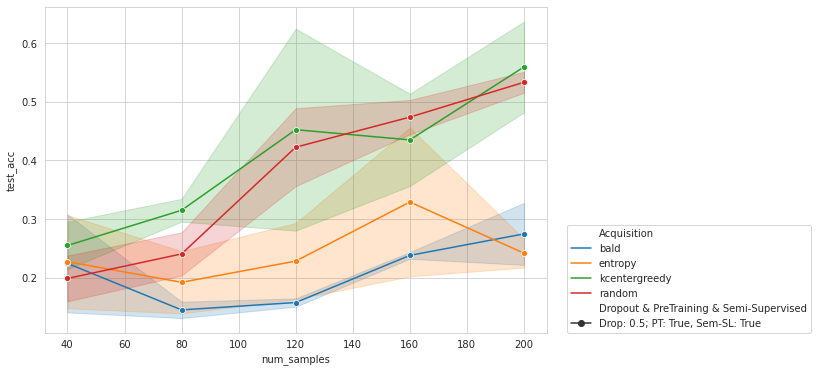

In [46]:
if style_vals is None:
    style_name = None
if unit_vals is None:
    unit_name = None

fig, ax = plt.subplots()
ax = plot_standard_dev(
    ax, df, hue=hue_name, style=style_name, units=unit_name
)  # , units=unit_name)
plt.legend(loc=(1.04,0))

fig.set_size_inches(9, 6)
plt.show()

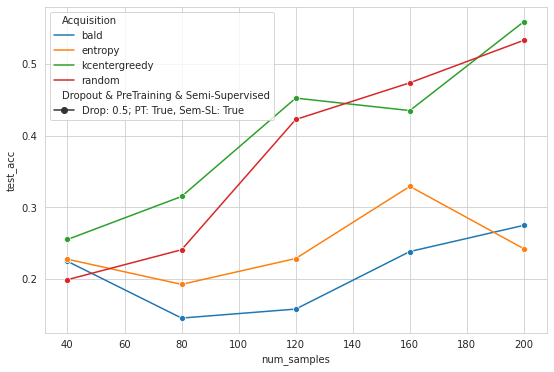

In [47]:
if style_vals is None:
    style_name = None
if unit_vals is None:
    unit_name = None

fig, ax = plt.subplots()
ax = plot_standard_dev(
    ax, df, hue=hue_name, style=style_name, units=unit_name, ci = None
)  # , units=unit_name)
fig.set_size_inches(9, 6)
plt.show()

In [72]:
def plot_standard_dev(
    ax,
    data,
    x: str = "num_samples",
    y: str = "test_acc",
    hue: str = "Sampling",
    style = None,
    units = None,
    ci = "sd",
    legend= 'auto'
) -> plt.Axes:
    """Creates a lineplot from dataframe with sns.lineplot.
    For information see:
    https://seaborn.pydata.org/generated/seaborn.lineplot.html

    Returns:
        plt.Axes: _description_
    """
    sns.lineplot(
        ax=ax,
        data=data,
        x=x,
        y=y,
        hue=hue,
        ci=ci,
        markers=True,
        marker="o",
        dashes=True,
        units=units,
        style=style,
        legend=legend,
    )
    return ax

In [126]:
# base_path = Path("/home/c817h/Documents/logs_cluster/activelearning/cifar10/active-standard")
# base_path = Path("/home/c817h/Documents/logs_cluster/activelearning/cifar10/active-cifar10_low_data")
base_path = Path("/home/c817h/Documents/logs_cluster/activelearning/cifar10/active-standard_250")
paths = [path for path in base_path.iterdir() if path.is_dir()]
paths.sort()
print("Folders in Path: \n {}\n".format(base_path))

for path in paths:
    print(path.name)

Folders in Path: 
 /home/c817h/Documents/logs_cluster/activelearning/cifar10/active-standard_250

basic-pretrained_model-resnet_drop-0.5_aug-cifar_basic_acq-bald_ep-80_freeze-False_smallhead-False
basic-pretrained_model-resnet_drop-0.5_aug-cifar_basic_acq-entropy_ep-80_freeze-False_smallhead-False
basic-pretrained_model-resnet_drop-0.5_aug-cifar_basic_acq-random_ep-80_freeze-False_smallhead-False
basic-pretrained_model-resnet_drop-0.5_aug-cifar_basic_acq-variationratios_ep-80_freeze-False_smallhead-False
basic-pretrained_model-resnet_drop-0_aug-cifar_basic_acq-entropy_ep-80_freeze-False_smallhead-False
basic-pretrained_model-resnet_drop-0_aug-cifar_basic_acq-random_ep-80_freeze-False_smallhead-False
basic-pretrained_model-resnet_drop-0_aug-cifar_basic_acq-variationratios_ep-80_freeze-False_smallhead-False
fixmatch-pretrained_model-resnet_fixmatch_drop-0.5_aug-cifar_basic_acq-bald_ep-200_freeze-True_smallhead-False
fixmatch-pretrained_model-resnet_fixmatch_drop-0.5_aug-cifar_basic_acq-b

In [140]:
# CIFAR-10
# base_paths = []
# base_paths.append(Path("/home/c817h/Documents/logs_cluster/activelearning/cifar10/active-cifar10_low_data"))
# base_paths.append(Path("/home/c817h/Documents/logs_cluster/activelearning/cifar10/active-standard_250"))
# base_paths.append(Path("/home/c817h/Documents/logs_cluster/activelearning/cifar10/active-standard"))

# CIFAR-100
base_paths = []
base_paths.append(Path("/home/c817h/Documents/logs_cluster/activelearning/cifar100/active-standard"))
base_paths.append(Path("/home/c817h/Documents/logs_cluster/activelearning/cifar100/active-cifar100"))

In [145]:
match_patterns = [
#     r".*drop-0.5_.*",
#     r".*drop-0_.*",
#     r".*random.*",
#     r".*fixmatch-pretrained_model.*",
#     r".*fixmatch-pretrained_model.*400",
    r".*basic-pretrained_model.*",
#     r".*fixmatch-pretrained_model-resnet_fixmatch_drop.*200",
#     r"model-",
    r".*cifar_randaugment_acq.*"
]

filter_patterns = [
#     ".*wd-0.01_.*"
#     r".*kcenter.*",
#     r".*variationratios.*"
]

In [146]:
dfs = []

for base_path in base_paths:
    paths = [path for path in base_path.iterdir() if path.is_dir()]
    paths.sort()
    print("Folders in Path: \n {}\n".format(base_path))

    
    experiment_paths = []
    for path in paths:
    #     print(path.name)
        for pattern in match_patterns:
    #         print(pattern)
            out = re.match(pattern, str(path.name))
            if out is not None:
                skip = False
                for filter_pattern in filter_patterns:
                    if re.match(filter_pattern, str(path)) is not None:
                        skip=True
                if skip:
                    continue

                print(path.name)
                experiment_paths.append(path)
                continue
                    
#         Set values for hues
    hue_name = "Acquisition"

    hue_split = "acq-"
    # style_name = "Augmentation"
    # style_fct = lambda x: x.name.split('aug-cifar_')[1].split('_')[0]

    # style_name = "Augmentation & dropout"
    # style_fct = lambda x: "Augmentation: {} , Dropout: {}".format(
    #     x.name.split('aug-cifar_')[1].split('_')[0],
    #     x.name.split('drop-')[1].split('_')[0],
    # )

    style_name = "Dropout"
    style_fct = lambda x: "Dropout: {}".format(
        x.name.split('drop-')[1].split('_')[0],
    )

    style_name = "Dropout & PreTraining"
    style_fct = lambda x: "Dropout: {} PreTraining: {}".format(
        x.name.split('drop-')[1].split('_')[0],
        "pretrained_model" in x.name
    )

    style_name = "Dropout & PreTraining & Semi-Supervised"
    style_fct = lambda x: "Drop: {}; PT: {}, Sem-SL: {}".format(
        x.name.split('drop-')[1].split('_')[0],
        "pretrained_model" in x.name,
        "fixmatch" in x.name
    )

    # style_fct = lambda x: None

    hue_names = [path.name.split(hue_split)[1].split('_')[0] for path in experiment_paths]#.split('_')[0] for path in paths]
    style_vals = [style_fct(path) for path in experiment_paths]

    unit_vals = None
    unit_name = "Unit"

    df = []
    for i, (base_dir) in enumerate(experiment_paths):
        base_dir = Path(base_dir)
        if hue_names is not None:
            hue_val = hue_names[i]
        else:
            hue_val = None
        if style_vals is not None:
            style_val = style_vals[i]
        else:
            style_val = None
        if unit_vals is not None:
            unit_val = unit_vals[i]
        else:
            unit_val = None

        experiment_frame = get_experiment_df(base_dir, hue_val)
        # experiment_frame[hue_name] = hue_val
        if experiment_frame is None:
            continue
        experiment_frame[hue_name] = hue_val
        experiment_frame[style_name] = style_val
        experiment_frame[unit_name] = unit_val
        df.append(experiment_frame)
    df = pd.concat(df)
    df.reset_index(inplace=True)

    dfs.append(df)
        
        
        
        
        

Folders in Path: 
 /home/c817h/Documents/logs_cluster/activelearning/cifar100/active-standard

basic-pretrained_model-resnet_drop-0.5_aug-cifar_basic_acq-bald_ep-80_freeze-False_smallhead-False
basic-pretrained_model-resnet_drop-0.5_aug-cifar_basic_acq-entropy_ep-80_freeze-False_smallhead-False
basic-pretrained_model-resnet_drop-0.5_aug-cifar_basic_acq-kcentergreedy_ep-80_freeze-False_smallhead-False
basic-pretrained_model-resnet_drop-0.5_aug-cifar_basic_acq-random_ep-80_freeze-False_smallhead-False
basic-pretrained_model-resnet_drop-0.5_aug-cifar_basic_acq-variationratios_ep-80_freeze-False_smallhead-False
basic-pretrained_model-resnet_drop-0_aug-cifar_basic_acq-entropy_ep-80_freeze-False_smallhead-False
basic-pretrained_model-resnet_drop-0_aug-cifar_basic_acq-kcentergreedy_ep-80_freeze-False_smallhead-False
basic-pretrained_model-resnet_drop-0_aug-cifar_basic_acq-random_ep-80_freeze-False_smallhead-False
basic-pretrained_model-resnet_drop-0_aug-cifar_basic_acq-variationratios_ep-80_f

In [147]:
len(dfs)

2

In [ ]:
num_cols = len(dfs)
ax_legend = 0
fig, axs = plt.subplots(ncols=num_cols, sharey=True)
if style_vals is None:
    style_name = None
if unit_vals is None:
    unit_name = None

for i in range(num_cols):
    df = dfs[i]
    ax = axs[i]
  
    legend = False
    if i == ax_legend:
        legend = 'auto'
    ax = plot_standard_dev(
        ax, df, hue=hue_name, style=style_name, units=unit_name, ci = 'sd', legend=legend
    )  # , units=unit_name)
    ax.set_xlabel("Labeled Samples")
    ax.set_ylabel("Test Accuracy [%]")
    if i == ax_legend:
        ax.get_legend().remove()
# fig.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
#           ncol=3, fancybox=True, shadow=True)
# fig.legend(loc='center left', bbox_to_anchor=(1, 0.5))
fig.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)

fig.set_size_inches(12, 6)
fig.tight_layout()
plt.show()

In [143]:
paths = []
paths += [
    "basic-pretrained_model-resnet_drop-0.5_aug-cifar_basic_acq-bald_ep-80_freeze-False_smallhead-False",
    "basic-pretrained_model-resnet_drop-0.5_aug-cifar_basic_acq-entropy_ep-80_freeze-False_smallhead-False",
    "basic-pretrained_model-resnet_drop-0.5_aug-cifar_basic_acq-random_ep-80_freeze-False_smallhead-False",
    "basic-pretrained_model-resnet_drop-0.5_aug-cifar_basic_acq-variationratios_ep-80_freeze-False_smallhead-False",
    "basic-pretrained_model-resnet_drop-0_aug-cifar_basic_acq-entropy_ep-80_freeze-False_smallhead-False",
    "basic-pretrained_model-resnet_drop-0_aug-cifar_basic_acq-random_ep-80_freeze-False_smallhead-False",
    "basic-pretrained_model-resnet_drop-0_aug-cifar_basic_acq-variationratios_ep-80_freeze-False_smallhead-False",
]


paths += [
    "model-resnet_drop-0.5_aug-cifar_basic_acq-bald_ep-200",
    "model-resnet_drop-0.5_aug-cifar_basic_acq-entropy_ep-200",
    "model-resnet_drop-0.5_aug-cifar_basic_acq-kcentergreedy_ep-200",
    "model-resnet_drop-0.5_aug-cifar_basic_acq-random_ep-200",
    "model-resnet_drop-0.5_aug-cifar_basic_acq-variationratios_ep-200",
]

paths += [
    "model-resnet_drop-0_aug-cifar_basic_acq-entropy_ep-200",
    "model-resnet_drop-0_aug-cifar_basic_acq-kcentergreedy_ep-200",
    "model-resnet_drop-0_aug-cifar_basic_acq-random_ep-200",
    "model-resnet_drop-0_aug-cifar_basic_acq-variationratios_ep-200",
    "model-resnet_drop-0_aug-cifar_randaugment_acq-entropy_ep-200",
    "model-resnet_drop-0_aug-cifar_randaugment_acq-kcentergreedy_ep-200",
    "model-resnet_drop-0_aug-cifar_randaugment_acq-random_ep-200",
    "model-resnet_drop-0_aug-cifar_randaugment_acq-variationratios_ep-200",
]

In [54]:
axs

array([<AxesSubplot:xlabel='num_samples', ylabel='test_acc'>,
       <AxesSubplot:xlabel='num_samples', ylabel='test_acc'>,
       <AxesSubplot:xlabel='num_samples', ylabel='test_acc'>],
      dtype=object)

In [144]:
paths

['basic-pretrained_model-resnet_drop-0.5_aug-cifar_basic_acq-bald_ep-80_freeze-False_smallhead-False',
 'basic-pretrained_model-resnet_drop-0.5_aug-cifar_basic_acq-entropy_ep-80_freeze-False_smallhead-False',
 'basic-pretrained_model-resnet_drop-0.5_aug-cifar_basic_acq-random_ep-80_freeze-False_smallhead-False',
 'basic-pretrained_model-resnet_drop-0.5_aug-cifar_basic_acq-variationratios_ep-80_freeze-False_smallhead-False',
 'basic-pretrained_model-resnet_drop-0_aug-cifar_basic_acq-entropy_ep-80_freeze-False_smallhead-False',
 'basic-pretrained_model-resnet_drop-0_aug-cifar_basic_acq-random_ep-80_freeze-False_smallhead-False',
 'basic-pretrained_model-resnet_drop-0_aug-cifar_basic_acq-variationratios_ep-80_freeze-False_smallhead-False',
 'model-resnet_drop-0.5_aug-cifar_basic_acq-bald_ep-200',
 'model-resnet_drop-0.5_aug-cifar_basic_acq-entropy_ep-200',
 'model-resnet_drop-0.5_aug-cifar_basic_acq-kcentergreedy_ep-200',
 'model-resnet_drop-0.5_aug-cifar_basic_acq-random_ep-200',
 'model

## Setting paths by Hand

In [64]:
paths = []
# paths += [
#     "basic_set-mnist_batchbald_double_query-bald_model-bayesian_mnist_ep-200",
#     "basic_set-mnist_batchbald_double_query-batchbald_model-bayesian_mnist_ep-200",
#     "basic_set-mnist_batchbald_double_query-entropy_model-bayesian_mnist_ep-200",
#     "basic_set-mnist_batchbald_double_query-variationratios_model-bayesian_mnist_ep-200",
#     "basic_set-mnist_batchbald_double_query-random_model-bayesian_mnist_ep-200",
# ]
paths += [
    "basic_set-mnist_batchbald_query-bald_model-bayesian_mnist_ep-200",
    "basic_set-mnist_batchbald_query-batchbald_model-bayesian_mnist_ep-200",
    "basic_set-mnist_batchbald_query-entropy_model-bayesian_mnist_ep-200",
    "basic_set-mnist_batchbald_query-variationratios_model-bayesian_mnist_ep-200",
    "basic_set-mnist_batchbald_query-random_model-bayesian_mnist_ep-200",
]
paths += [
    "basic_set-mnist_batchbald_start_query-bald_model-bayesian_mnist_ep-200",
    "basic_set-mnist_batchbald_start_query-batchbald_model-bayesian_mnist_ep-200",
    "basic_set-mnist_batchbald_start_query-entropy_model-bayesian_mnist_ep-200",
    "basic_set-mnist_batchbald_start_query-variationratios_model-bayesian_mnist_ep-200",
    "basic_set-mnist_batchbald_start_query-random_model-bayesian_mnist_ep-200",
]

style_names = [path.find("start")!=-1 for path in paths]
# style_names = [path.find("double")!=-1 for path in paths]
hue_names = [path.split("query-")[1].split("_")[0] for path in paths]
# base_path = "/home/c817h/Documents/logs_cluster/activelearning/mnist"
base_path = "/home/c817h/Documents/logs_cluster/activelearning/fashion_mnist"
experiment_paths = [os.path.join(base_path, path) for path in paths]

In [4]:
df = []
style_th="start@100"
hue_th="Acq. Fct."

for name, base_dir, style_name in zip(hue_names, experiment_paths, style_names):
    base_dir = Path(base_dir)
    # import IPython

    # IPython.embed()
    # try:
    experiment_frame = get_experiment_df(base_dir, name)

    # this is currently highly experimental -- try to get the configs for later use.
    # experiment_param_frame = get_experiment_configs_df(base_dir, name)
#     experiment_frame["acq-20"] = style_name
    experiment_frame[style_th] = style_name
    df.append(experiment_frame)
    # except:
    #     for path in base_dir.iterdir():
    #         if path.is_dir():
    #             experiment_frame = get_experiment_df(path, name)
    #             df.append(experiment_frame)
    # df.append(experiment_frame)
df = pd.concat(df)
df.reset_index(inplace=True)

Loading Experiment: /home/c817h/Documents/logs_cluster/activelearning/fashion_mnist/basic_set-mnist_batchbald_query-bald_model-bayesian_mnist_ep-200
Found num files: 3
Loading Experiment: /home/c817h/Documents/logs_cluster/activelearning/fashion_mnist/basic_set-mnist_batchbald_query-batchbald_model-bayesian_mnist_ep-200
Found num files: 3
Loading Experiment: /home/c817h/Documents/logs_cluster/activelearning/fashion_mnist/basic_set-mnist_batchbald_query-entropy_model-bayesian_mnist_ep-200
Found num files: 3
Loading Experiment: /home/c817h/Documents/logs_cluster/activelearning/fashion_mnist/basic_set-mnist_batchbald_query-variationratios_model-bayesian_mnist_ep-200
Found num files: 3
Loading Experiment: /home/c817h/Documents/logs_cluster/activelearning/fashion_mnist/basic_set-mnist_batchbald_query-random_model-bayesian_mnist_ep-200
Found num files: 3
Loading Experiment: /home/c817h/Documents/logs_cluster/activelearning/fashion_mnist/basic_set-mnist_batchbald_start_query-bald_model-bayesi

ValueError: Could not interpret value `Acquisition` for parameter `hue`

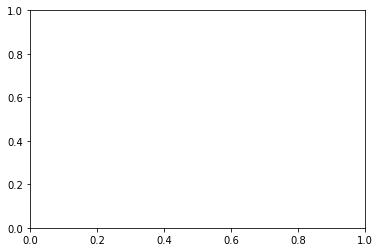

In [65]:
from plotlib.performance_plots import plot_standard_dev
fig, ax = plt.subplots()
plot_standard_dev(ax, df, hue=hue_name, style=style_th)
# ax.set_xlim(95, 250)
# ax.set_ylim(0.85, 0.97)
ax.set_xlim(95, 255)
ax.set_ylim(0.65, 0.775)
fig.set_size_inches(9,6)
plt.show()

In [114]:
from typing import Optional
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

def plot_standard_dev(
    ax: plt.Axes,
    data: pd.DataFrame,
    x: str = "num_samples",
    y: str = "test_acc",
    hue: str = "Sampling",
    style: Optional[str] = None,
    units: Optional[str] = None,
) -> plt.Axes:
    """Creates a lineplot from dataframe with sns.lineplot.
    For information see:
    https://seaborn.pydata.org/generated/seaborn.lineplot.html

    Returns:
        plt.Axes: _description_
    """
    sns.lineplot(
        ax=ax,
        data=data,
        x=x,
        y=y,
        hue=hue,
        ci=None,
        markers=True,
        marker="o",
        dashes=True,
        units=units,
        style=style,
    )
    return ax

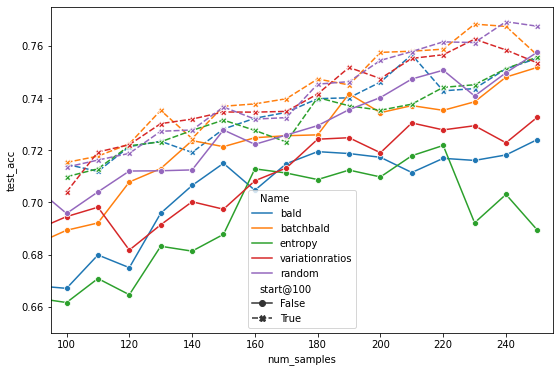

In [116]:
fig, ax = plt.subplots()
plot_standard_dev(ax, df, hue="Name", style=style_th)
ax.set_xlim(95, 255)
ax.set_ylim(0.65, 0.775)
fig.set_size_inches(9,6)
plt.show()